In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, cross_val_score

import warnings
warnings.filterwarnings('ignore')

RSEED = 25



In [2]:
df = pd.read_csv("data/train.csv")

In [3]:
print(df.head())
print(df.shape)
print(df.isnull().sum())
print(df.dtypes)
df.nunique()

           ID       DATOP     FLTID DEPSTN ARRSTN                  STD   
0  train_id_0  2016-01-03  TU 0712     CMN    TUN  2016-01-03 10:30:00  \
1  train_id_1  2016-01-13  TU 0757     MXP    TUN  2016-01-13 15:05:00   
2  train_id_2  2016-01-16  TU 0214     TUN    IST  2016-01-16 04:10:00   
3  train_id_3  2016-01-17  TU 0480     DJE    NTE  2016-01-17 14:10:00   
4  train_id_4  2016-01-17  TU 0338     TUN    ALG  2016-01-17 14:30:00   

                   STA STATUS         AC  target  
0  2016-01-03 12.55.00    ATA  TU 32AIMN   260.0  
1  2016-01-13 16.55.00    ATA  TU 31BIMO    20.0  
2  2016-01-16 06.45.00    ATA  TU 32AIMN     0.0  
3  2016-01-17 17.00.00    ATA  TU 736IOK     0.0  
4  2016-01-17 15.50.00    ATA  TU 320IMU    22.0  
(107833, 10)
ID        0
DATOP     0
FLTID     0
DEPSTN    0
ARRSTN    0
STD       0
STA       0
STATUS    0
AC        0
target    0
dtype: int64
ID         object
DATOP      object
FLTID      object
DEPSTN     object
ARRSTN     object
STD        ob

ID        107833
DATOP       1011
FLTID       1861
DEPSTN       132
ARRSTN       128
STD        81697
STA        85136
STATUS         5
AC            68
target       968
dtype: int64

In [4]:
df['route'] = df['DEPSTN'] + '-' + df['ARRSTN']

<Axes: xlabel='route', ylabel='target'>

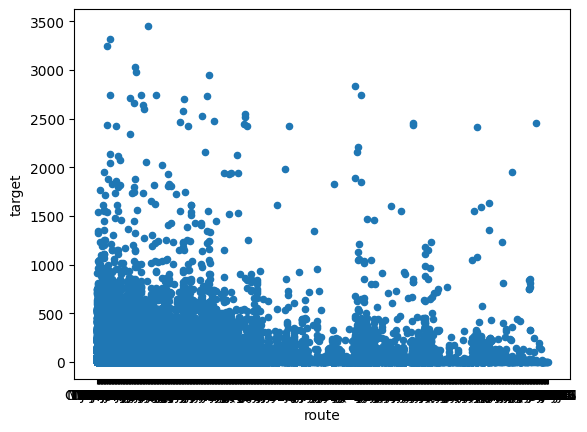

In [5]:
df.plot(x= 'route',y='target', kind='scatter')

In [6]:
print(df['STATUS'].unique())

col_entries = ['ATA', 'DEP', 'RTR', 'SCH', 'DEL']

for i in col_entries:
    print(f"Number of entries of {i}: {df[df['STATUS'] == i].shape[0]}")
    print(f"Mean: {df[df['STATUS'] == i]['target'].mean()}")
    print(f"Median: {df[df['STATUS'] == i]['target'].median()}")



['ATA' 'DEP' 'RTR' 'SCH' 'DEL']
Number of entries of ATA: 93679
Mean: 55.65509879482061
Median: 19.0
Number of entries of DEP: 467
Mean: 44.46252676659529
Median: 0.0
Number of entries of RTR: 294
Mean: 69.89455782312925
Median: 17.0
Number of entries of SCH: 13242
Mean: 0.0
Median: 0.0
Number of entries of DEL: 151
Mean: 0.0
Median: 0.0


In [7]:
df['STA'] = df['STA'].str.replace('.',':')

<Axes: >

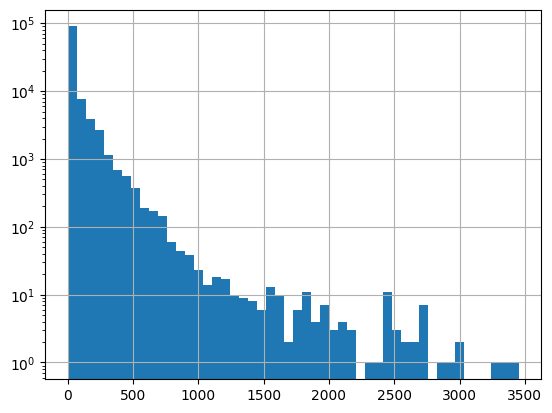

In [8]:
df['target'].hist(bins = 50, log =True)

In [9]:
df.head(20)

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,route
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,CMN-TUN
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,MXP-TUN
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,TUN-IST
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,DJE-NTE
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,TUN-ALG
5,train_id_5,2016-01-17,TU 0283,TLS,TUN,2016-01-17 16:20:00,2016-01-17 18:15:00,ATA,TU 736IOP,53.0,TLS-TUN
6,train_id_6,2016-01-18,TU 0514,TUN,BCN,2016-01-18 07:15:00,2016-01-18 09:00:00,ATA,TU 32AIMH,10.0,TUN-BCN
7,train_id_7,2016-01-18,TU 0716,TUN,ORY,2016-01-18 07:35:00,2016-01-18 09:55:00,ATA,TU 32AIMI,15.0,TUN-ORY
8,train_id_8,2016-01-18,TU 0752,TUN,FCO,2016-01-18 07:40:00,2016-01-18 09:00:00,ATA,TU 32AIMC,16.0,TUN-FCO
9,train_id_9,2016-01-18,TU 0996,TUN,NCE,2016-01-18 07:45:00,2016-01-18 09:15:00,ATA,TU 31AIMK,21.0,TUN-NCE


In [10]:
df['DATOP'] = pd.to_datetime(df['DATOP'], format='%Y-%m-%d')
df['STD'] = pd.to_datetime(df['STD'], format='%Y-%m-%d %H:%M:%S')
df['STA'] = pd.to_datetime(df['STA'], format='%Y-%m-%d %H:%M:%S')

In [11]:
# extract year, month, dayofweek and hour information out of column publish_time and build new column for each
df["DATOP_year"]=df["DATOP"].dt.year
df["DATOP_month"]=df["DATOP"].dt.month
df["DATOP_day"]=df["DATOP"].dt.dayofweek+1
#df["publish_hour"]=df["publish_time"].dt.hour

In [12]:
df['flight_time'] = (df['STA'] - df['STD']).dt.total_seconds() / 60

In [13]:
df.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,route,DATOP_year,DATOP_month,DATOP_day,flight_time
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,CMN-TUN,2016,1,7,145.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,MXP-TUN,2016,1,3,110.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,TUN-IST,2016,1,6,155.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,DJE-NTE,2016,1,7,170.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,TUN-ALG,2016,1,7,80.0


[2016 2017 2018]


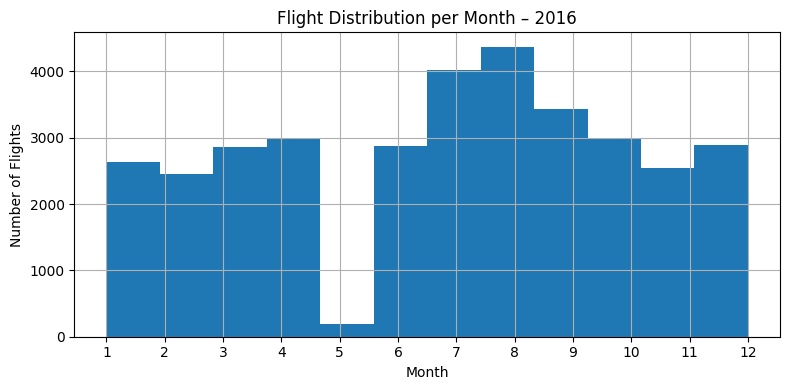

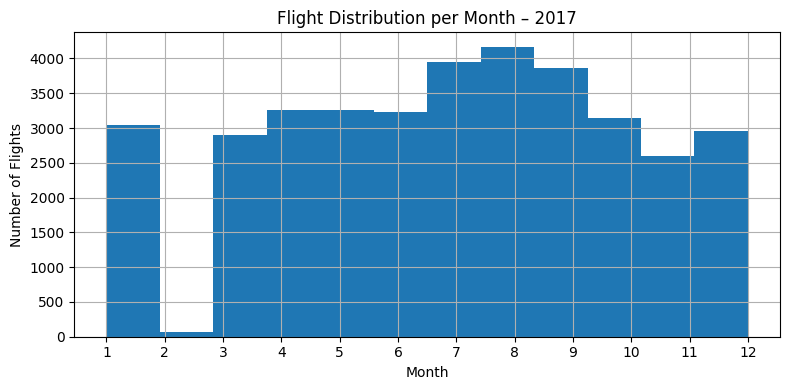

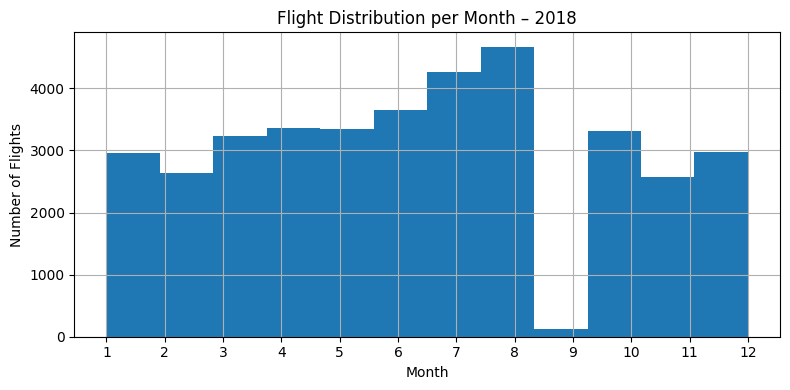

In [14]:
print(df['DATOP_year'].unique())

col_entries = [2016, 2017, 2018]

for i in col_entries:
    plt.figure(figsize=(8, 4))
    df_year = df[df['DATOP_year'] == i]
    df_year['DATOP_month'].hist(bins=12)
    plt.title(f"Flight Distribution per Month – {i}")
    plt.xlabel("Month")
    plt.ylabel("Number of Flights")
    plt.xticks(range(1, 13))
    plt.tight_layout()
    plt.show()

[2016 2017 2018]


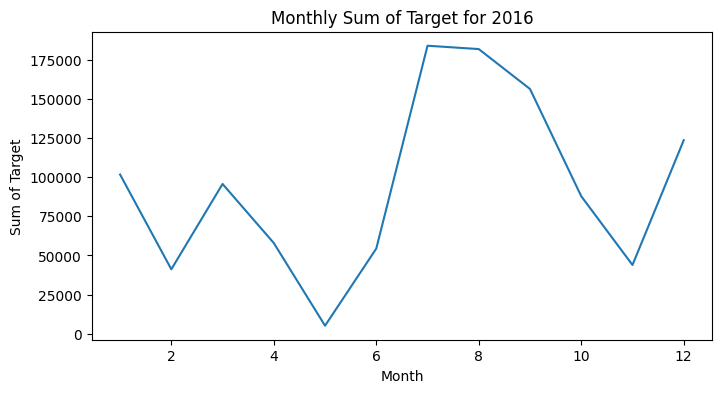

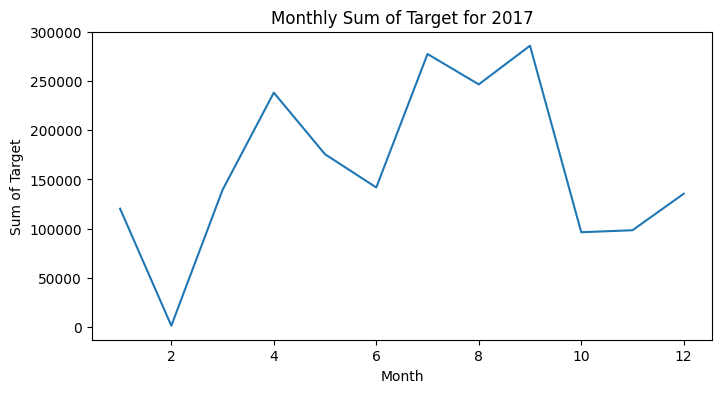

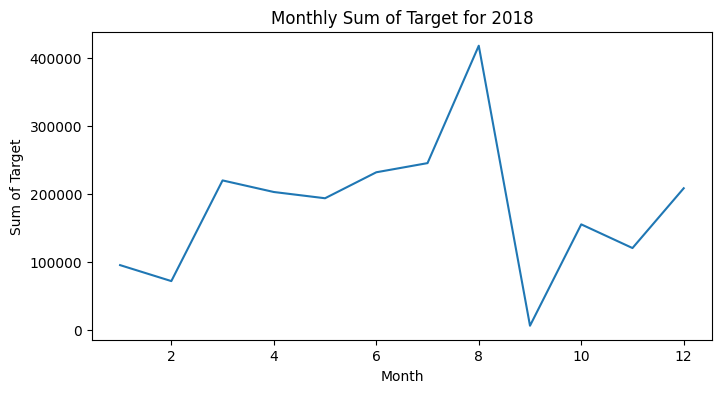

In [15]:
print(df['DATOP_year'].unique())

col_entries = [2016, 2017, 2018]

for i in col_entries:
    plt.figure(figsize=(8, 4))
    df_year = df[df['DATOP_year'] == i]
    df_year.groupby('DATOP_month')['target'].sum().plot(
    kind='line', 
    title=f'Monthly Sum of Target for {i}', 
    xlabel='Month', 
    ylabel='Sum of Target'
)

In [32]:
df2 = pd.get_dummies(df, columns=['DATOP_day'], prefix='day', drop_first=True, dtype=int)
df2 = pd.get_dummies(df2, columns=['DATOP_year'], prefix='yr', drop_first=True, dtype=int)
df2 = pd.get_dummies(df2, columns=['DATOP_month'], prefix='mon', drop_first=True, dtype=int)
df2 = pd.get_dummies(df2, columns=['DEPSTN'], prefix='dep', drop_first=True, dtype=int)
df2 = pd.get_dummies(df2, columns=['ARRSTN'], prefix='arr', drop_first=True, dtype=int)
df2 = pd.get_dummies(df2, columns=['AC'], prefix='ac', drop_first=True, dtype=int)



In [17]:
df2.head()

,ID,DATOP,FLTID,ARRSTN,STD,STA,STATUS,target,route,flight_time,...,ac_TU CR9ISA,ac_TU CR9XXX,ac_UG AT7AT7,ac_UG AT7LBD,ac_UG AT7LBE,ac_UG CR9CR9,ac_UG CR9ISA,ac_UG CR9XXX,ac_UJ 320TCF,ac_X9 320VEB
0,train_id_0,2016-01-03,TU 0712,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,260.0,CMN-TUN,145.0,...,0,0,0,0,0,0,0,0,0,0
1,train_id_1,2016-01-13,TU 0757,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,20.0,MXP-TUN,110.0,...,0,0,0,0,0,0,0,0,0,0
2,train_id_2,2016-01-16,TU 0214,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,0.0,TUN-IST,155.0,...,0,0,0,0,0,0,0,0,0,0
3,train_id_3,2016-01-17,TU 0480,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,0.0,DJE-NTE,170.0,...,0,0,0,0,0,0,0,0,0,0
4,train_id_4,2016-01-17,TU 0338,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,22.0,TUN-ALG,80.0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
y = df2.target
X = df2.drop('target', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RSEED)

<Axes: >

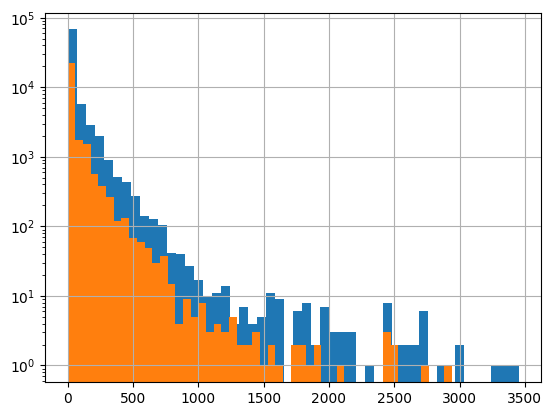

In [19]:
y_train.hist(bins = 50, log =True)
y_test.hist(bins = 50, log =True)

In [20]:
df2.head()

,ID,DATOP,FLTID,ARRSTN,STD,STA,STATUS,target,route,flight_time,...,ac_TU CR9ISA,ac_TU CR9XXX,ac_UG AT7AT7,ac_UG AT7LBD,ac_UG AT7LBE,ac_UG CR9CR9,ac_UG CR9ISA,ac_UG CR9XXX,ac_UJ 320TCF,ac_X9 320VEB
0,train_id_0,2016-01-03,TU 0712,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,260.0,CMN-TUN,145.0,...,0,0,0,0,0,0,0,0,0,0
1,train_id_1,2016-01-13,TU 0757,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,20.0,MXP-TUN,110.0,...,0,0,0,0,0,0,0,0,0,0
2,train_id_2,2016-01-16,TU 0214,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,0.0,TUN-IST,155.0,...,0,0,0,0,0,0,0,0,0,0
3,train_id_3,2016-01-17,TU 0480,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,0.0,DJE-NTE,170.0,...,0,0,0,0,0,0,0,0,0,0
4,train_id_4,2016-01-17,TU 0338,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,22.0,TUN-ALG,80.0,...,0,0,0,0,0,0,0,0,0,0


Moritz - Add weekday to model

- Weekday vs delay

In [21]:
try1 = df.groupby('DATOP_day')['target'].sum()
try2 = df.groupby('DATOP_day')['ID'].count()
try1.corr(try2)

0.9830685652514247

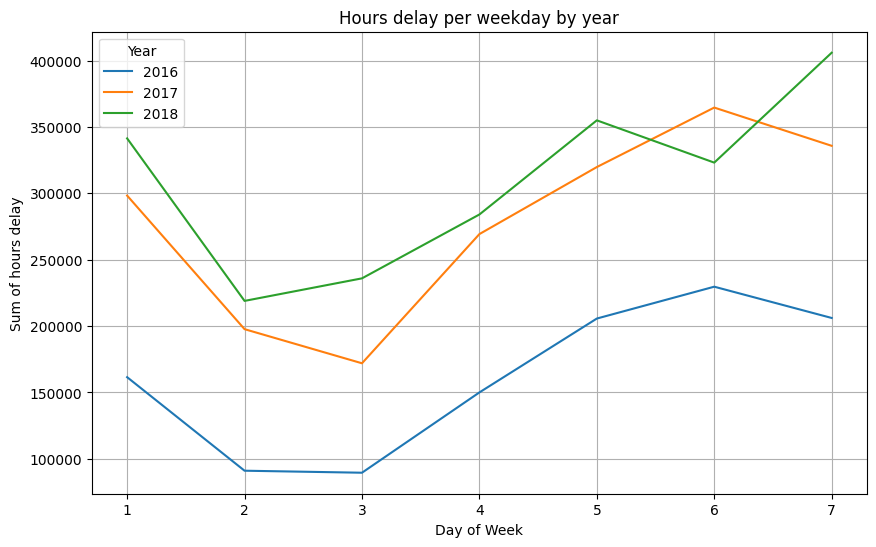

In [22]:
grouped = df.groupby(['DATOP_year', 'DATOP_day'])['target'].sum().unstack(level=0)

grouped.plot(kind='line', figsize=(10, 6))
plt.xlabel('Day of Week')
plt.ylabel('Sum of hours delay')
plt.title('Hours delay per weekday by year')
plt.legend(title='Year')
plt.grid(True)
plt.show()

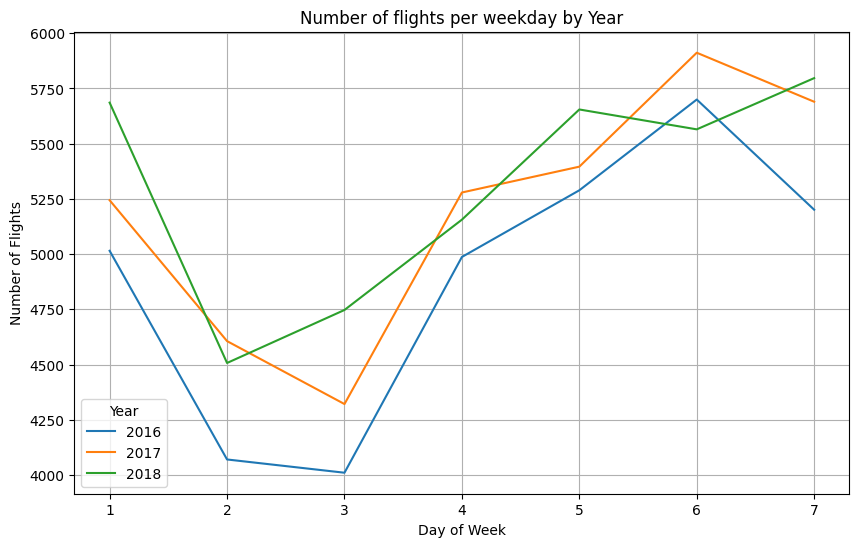

In [23]:
grouped = df.groupby(['DATOP_year', 'DATOP_day'])['ID'].count().unstack(level=0)

grouped.plot(kind='line', figsize=(10, 6))
plt.xlabel('Day of Week')
plt.ylabel('Number of Flights')
plt.title('Number of flights per weekday by Year')
plt.legend(title='Year')
plt.grid(True)
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
#from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
df2.head()

,ID,DATOP,FLTID,ARRSTN,STD,STA,STATUS,target,route,flight_time,...,ac_TU CR9ISA,ac_TU CR9XXX,ac_UG AT7AT7,ac_UG AT7LBD,ac_UG AT7LBE,ac_UG CR9CR9,ac_UG CR9ISA,ac_UG CR9XXX,ac_UJ 320TCF,ac_X9 320VEB
0,train_id_0,2016-01-03,TU 0712,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,260.0,CMN-TUN,145.0,...,0,0,0,0,0,0,0,0,0,0
1,train_id_1,2016-01-13,TU 0757,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,20.0,MXP-TUN,110.0,...,0,0,0,0,0,0,0,0,0,0
2,train_id_2,2016-01-16,TU 0214,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,0.0,TUN-IST,155.0,...,0,0,0,0,0,0,0,0,0,0
3,train_id_3,2016-01-17,TU 0480,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,0.0,DJE-NTE,170.0,...,0,0,0,0,0,0,0,0,0,0
4,train_id_4,2016-01-17,TU 0338,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,22.0,TUN-ALG,80.0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
prefixes = ['day_', 'yr_', 'mt_','ac_','dep_','arr_']

# Collect columns that match those prefixes
feature_cols = [col for col in df2.columns if any(col.startswith(p) for p in prefixes)]+['flight_time']

x0 = X_train[feature_cols]
x1 = X_test[feature_cols]


model = LinearRegression()
#model = KNeighborsRegressor(n_neighbors=5)

model.fit(x0, y_train)
y_pred_test = model.predict(x1)

print(np.sqrt(mean_squared_error(y_test, y_pred_test)))
print(r2_score(y_test, y_pred_test))

110.62076711131256
0.05716586573139537


In [27]:
df.columns

Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC', 'target', 'route', 'DATOP_year', 'DATOP_month', 'DATOP_day',
       'flight_time'],
      dtype='object')

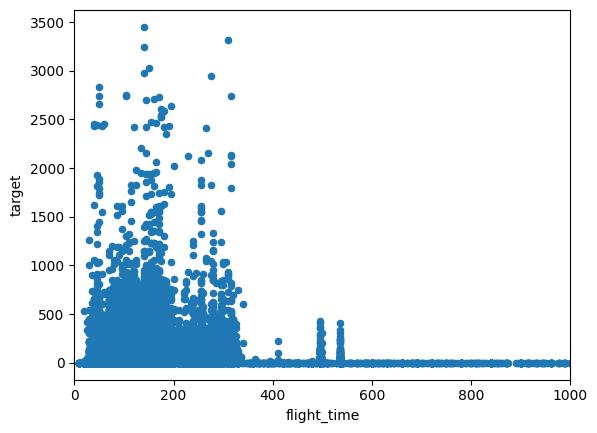

In [28]:
df.plot(x='flight_time', y = 'target', kind ="scatter")

plt.xlim(0, 1000)

plt.show()